# Project Week 4

In [131]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns

In [55]:
df = pd.read_csv("beer_reviews.csv")

In [56]:
df.head(10)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


columns #1: index  is type: <class 'str'>
Missing values 0


brewery_id
35       39444
10099    33839
147      33066
140      28751
287      25191
         ...  
24502        1
17224        1
24526        1
17216        1
15048        1
Length: 5840, dtype: int64

Text(0.5, 1.0, 'brewery_id')

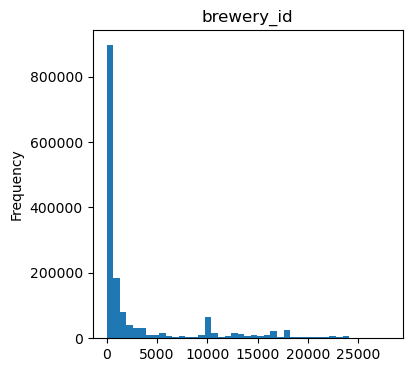

In [57]:
# 1 - brewery_id          
print('columns #1:', df.columns[0] , ' is type:', type( df.columns[0]) )
print('Missing values',df['brewery_id'].isna().sum())
#display(df['brewery_id'].describe())
display(df.value_counts('brewery_id'))
display(df["brewery_id"].plot.hist(bins=43, figsize=(4, 4)).set_title('brewery_id'))

In [58]:
df['brewery_id'].nunique()

5840

In [87]:
# 2 - review_overall                 
print('columns #3:', df.columns[1] , ' is type:', type( df.columns[1]) )
print('Missing values',df['brewery_name'].isna().sum())
#display(df['brewery_id'].describe())
display(df.value_counts('brewery_name'))


columns #3: brewery_name  is type: <class 'str'>
Missing values 0


count    1.586614e+06
mean     3.815581e+00
std      7.206219e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_overall, dtype: float64

review_overall
4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
dtype: int64

In [62]:
df.loc[df['brewery_name'].isna()]['brewery_id']

Series([], Name: brewery_id, dtype: int64)

In [61]:
# Data cleanning
df.loc[df['brewery_id'] == 1193,'brewery_name'] = 'Unknow brewery2'
df.loc[df['brewery_id'] == 27,'brewery_name'] = 'Unknow brewery'

columns #3: brewery_name  is type: <class 'str'>
Missing values 0


count    1.586614e+06
mean     1.224089e+09
std      7.654427e+07
min      8.406720e+08
25%      1.173224e+09
50%      1.239203e+09
75%      1.288568e+09
max      1.326285e+09
Name: review_time, dtype: float64

review_time
1101772800    21
926380801      8
1031101200     8
980812801      7
897091201      7
              ..
1201481258     1
1201481128     1
1201481119     1
1201481073     1
1326285348     1
Length: 1577960, dtype: int64

Text(0.5, 1.0, 'review_time')

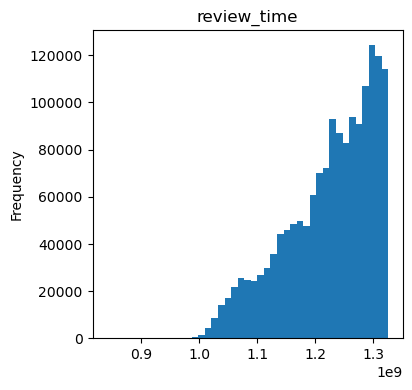

In [67]:
# 3 - review_time             
print('columns #3:', df.columns[2] , ' is type:', type( df.columns[2]) )
print('Missing values',df['review_time'].isna().sum())
display(df['review_time'].describe())
display(df.value_counts('review_time'))
display(df["review_time"].plot.hist(bins=43, figsize=(4, 4)).set_title('review_time'))

In [138]:
df["review_date"] = df["review_time"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d/%m/%y"))

columns #3: review_overall  is type: <class 'str'>
Missing values 0


count    1.586614e+06
mean     3.815585e+00
std      7.206016e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_overall, dtype: float64

review_overall
4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10961
dtype: int64

Text(0.5, 1.0, 'review_overall')

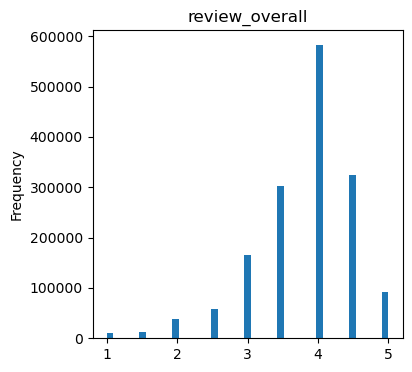

In [90]:
# 4 - review_overall            
print('columns #4:', df.columns[3] , ' is type:', type( df.columns[3]) )
print('Missing values',df['review_overall'].isna().sum())
display(df['review_overall'].describe())
display(df.value_counts('review_overall'))
display(df["review_overall"].plot.hist(bins=43, figsize=(4, 4)).set_title('review_overall'))

In [89]:
# Data cleanning
df.loc[df['review_overall'] == 0,'review_overall'] = 1

columns #5: review_overall  is type: <class 'str'>
Missing values 0


count    1.586614e+06
mean     3.815585e+00
std      7.206016e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_overall, dtype: float64

review_aroma
4.0    557383
3.5    365312
4.5    271450
3.0    200030
2.5     66359
5.0     64117
2.0     42566
1.5     12524
1.0      6873
dtype: int64

Text(0.5, 1.0, 'review_aroma')

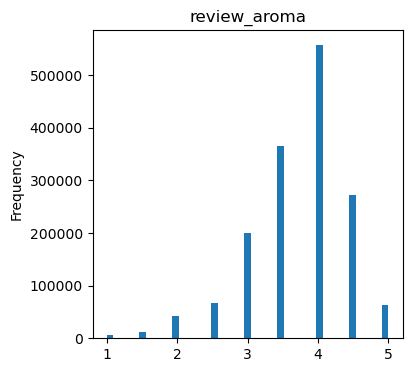

In [91]:
# 5 - review_aroma           
print('columns #5:', df.columns[4] , ' is type:', type( df.columns[4]) )
print('Missing values',df['review_aroma'].isna().sum())
display(df['review_overall'].describe())
display(df.value_counts('review_aroma'))
display(df["review_aroma"].plot.hist(bins=43, figsize=(4, 4)).set_title('review_aroma'))

columns #6: review_aroma  is type: <class 'str'>
Missing values 0


count    1.586614e+06
mean     3.841646e+00
std      6.160688e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: review_appearance, dtype: float64

review_appearance
4.0    674186
3.5    318529
4.5    288108
3.0    166009
5.0     65398
2.5     39493
2.0     25414
1.5      6147
1.0      3330
dtype: int64

Text(0.5, 1.0, 'review_appearance')

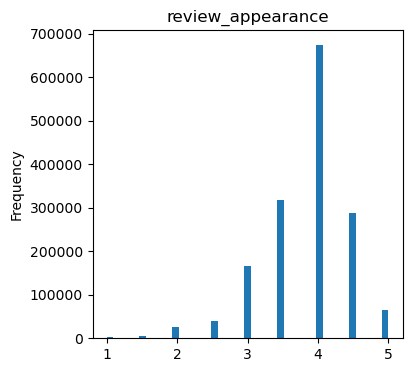

In [94]:
# 6 - review_appearance           
print('columns #6:', df.columns[5] , ' is type:', type( df.columns[5]) )
print('Missing values',df['review_appearance'].isna().sum())
display(df['review_appearance'].describe())
display(df.value_counts('review_appearance'))
display(df["review_appearance"].plot.hist(bins=43, figsize=(4, 4)).set_title('review_appearance'))

In [93]:
# Data cleanning
df.loc[df['review_appearance'] == 0,'review_appearance'] = 1

In [97]:
# 7 - review_profilename           
print('columns #7:', df.columns[6] , ' is type:', type( df.columns[6]) )
print('Missing values',df['review_profilename'].isna().sum())
#display(df['review_profilename'].describe())
display(df.value_counts('review_profilename'))
#display(df["review_profilename"].plot.hist(bins=43, figsize=(4, 4)).set_title('review_profilename'))

columns #7: review_appearance  is type: <class 'str'>
Missing values 348


review_profilename
northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
                  ... 
clwaldin             1
cm1165               1
cmartin45            1
cmaude               1
zzajjber             1
Length: 33387, dtype: int64

Text(0.5, 1.0, 'review_overall from northyorksammy')

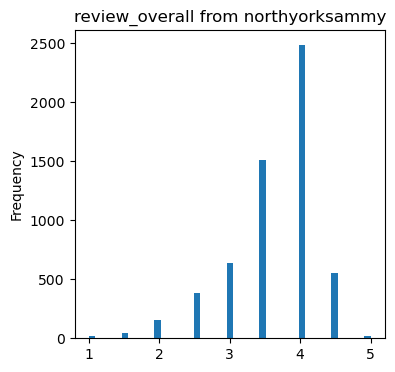

In [100]:

display(df.loc[df['review_profilename'] == 'northyorksammy','review_overall'].plot.hist(bins=43, figsize=(4, 4)).set_title('review_overall from northyorksammy'))

In [105]:
# 8 - review_profilename           
print('columns #8:', df.columns[7] , ' is type:', type( df.columns[7]) )
print('Missing values',df['beer_style'].isna().sum())
#display(df['beer_style'].describe())
display(df.value_counts('beer_style'))
#display(df["beer_style"].plot.hist(bins=43, figsize=(4, 4)).set_title('beer_style'))
#display(df["beer_style"].value_counts().plot(kind='bar', figsize=(4, 4)).set_title('beer_style Distribution'))


columns #8: review_profilename  is type: <class 'str'>
Missing values 0


beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Length: 104, dtype: int64

columns #9: beer_style  is type: <class 'str'>
Missing values 0


review_palate
4.0    606711
3.5    338585
4.5    253102
3.0    206932
2.5     62842
5.0     62190
2.0     38333
1.5     11045
1.0      6874
dtype: int64

Text(0.5, 1.0, 'review_palate')

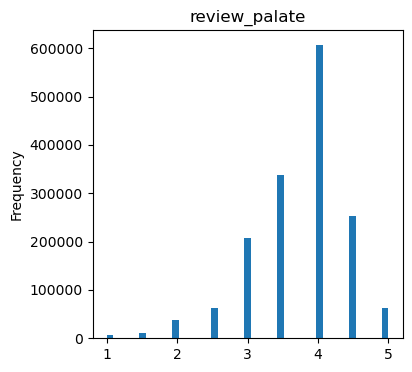

In [107]:
# 9 - review_palate          
print('columns #9:', df.columns[8] , ' is type:', type( df.columns[8]) )
print('Missing values',df['review_palate'].isna().sum())
#display(df['review_palate'].describe())
display(df.value_counts('review_palate'))
display(df["review_palate"].plot.hist(bins=43, figsize=(4, 4)).set_title('review_palate'))
#display(df["review_palate"].value_counts().plot(kind='bar', figsize=(4, 4)).set_title('review_palate Distribution'))


columns #9: review_palate  is type: <class 'str'>
Missing values 0


review_taste
4.0    541429
4.5    336162
3.5    324541
3.0    166860
5.0     83977
2.5     66534
2.0     41992
1.5     15128
1.0      9991
dtype: int64

Text(0.5, 1.0, 'review_taste')

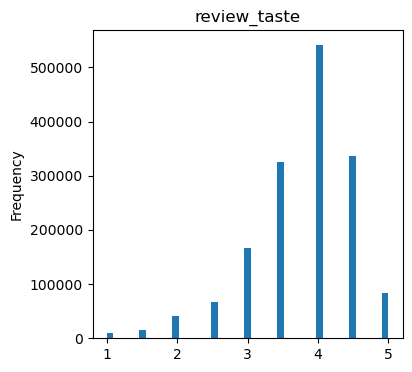

In [108]:
# 10 - review_palate          
print('columns #10:', df.columns[9] , ' is type:', type( df.columns[9]) )
print('Missing values',df['review_taste'].isna().sum())
#display(df['review_taste'].describe())
display(df.value_counts('review_taste'))
display(df["review_taste"].plot.hist(bins=43, figsize=(4, 4)).set_title('review_taste'))
#display(df["review_taste"].value_counts().plot(kind='bar', figsize=(4, 4)).set_title('review_taste Distribution'))


In [110]:
# 11 - review_palate          
print('columns #11:', df.columns[10] , ' is type:', type( df.columns[10]) )
print('Missing values',df['beer_name'].isna().sum())
#display(df['beer_name'].describe())
display(df.value_counts('beer_name'))
#display(df["beer_name"].plot.hist(bins=43, figsize=(4, 4)).set_title('beer_name'))
#display(df["beer_name"].value_counts().plot(kind='bar', figsize=(4, 4)).set_title('beer_name Distribution'))


columns #11: review_taste  is type: <class 'str'>
Missing values 0


beer_name
90 Minute IPA                          3290
India Pale Ale                         3130
Old Rasputin Russian Imperial Stout    3111
Sierra Nevada Celebration Ale          3000
Two Hearted Ale                        2728
                                       ... 
Krug-Bräu Pilsner                         1
Krug-Bräu Festbier                        1
Krug Premium                              1
Kross Maibock                             1
葉山ビール (Hayama Beer)                       1
Length: 56857, dtype: int64

columns #12: beer_name  is type: <class 'str'>
Missing values 67785


count    1.518829e+06
mean     7.042387e+00
std      2.322526e+00
min      1.000000e-02
25%      5.200000e+00
50%      6.500000e+00
75%      8.500000e+00
max      5.770000e+01
Name: beer_abv, dtype: float64

beer_abv
5.00     109144
8.00      67744
6.00      65383
7.00      59460
9.00      59183
          ...  
7.51          1
7.21          1
7.17          1
6.27          1
57.70         1
Length: 530, dtype: int64

Text(0.5, 1.0, 'beer_abv')

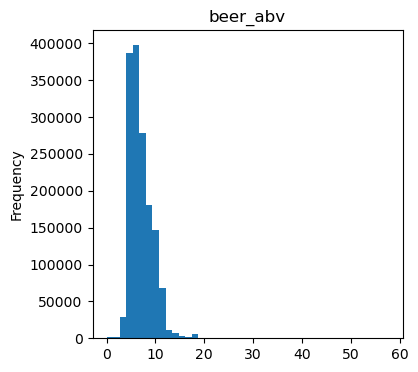

In [113]:
# 12 - beer_abv          
print('columns #12:', df.columns[11] , ' is type:', type( df.columns[11]) )
print('Missing values',df['beer_abv'].isna().sum())
display(df['beer_abv'].describe())
display(df.value_counts('beer_abv'))
display(df["beer_abv"].plot.hist(bins=43, figsize=(4, 4)).set_title('beer_abv'))
#display(df["beer_abv"].value_counts().plot(kind='bar', figsize=(4, 4)).set_title('beer_name Distribution'))


In [118]:
df.loc[df['beer_abv'] >= 20]

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
12918,12918,6513,Schorschbräu,1248785936,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 31%,30.86,51466
12919,12919,6513,Schorschbräu,1316780901,4.0,4.0,4.0,kappldav123,Eisbock,4.0,3.5,Schorschbräu Schorschbock 57%,57.70,73368
12934,12934,6513,Schorschbräu,1264684153,4.0,4.5,4.5,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 40%,39.44,55712
12939,12939,6513,Schorschbräu,1309974178,4.0,4.0,3.5,Sunnanek,Eisbock,4.0,4.0,Schorschbräu Schorschbock 43%,43.00,57856
12940,12940,6513,Schorschbräu,1274469798,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 43%,43.00,57856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386403,1386403,1924,DuClaw Brewing Company,1265957224,2.5,4.0,4.0,willPS21,American Strong Ale,4.0,3.5,Colossus,21.92,48881
1386404,1386404,1924,DuClaw Brewing Company,1243749469,3.0,3.5,4.0,ChainGangGuy,American Strong Ale,4.0,4.0,Colossus,21.92,48881
1386405,1386405,1924,DuClaw Brewing Company,1238893861,3.5,3.5,4.0,BeerSox,American Strong Ale,4.0,4.0,Colossus,21.92,48881
1386406,1386406,1924,DuClaw Brewing Company,1238768944,4.5,4.5,4.5,beermantimmie,American Strong Ale,4.5,4.0,Colossus,21.92,48881


columns #13: beer_abv  is type: <class 'str'>
Missing values 0


count    1.586614e+06
mean     2.171279e+04
std      2.181834e+04
min      3.000000e+00
25%      1.717000e+03
50%      1.390600e+04
75%      3.944100e+04
max      7.731700e+04
Name: beer_beerid, dtype: float64

beer_beerid
2093     3290
412      3111
1904     3000
1093     2728
4083     2704
         ... 
43345       1
43344       1
43340       1
43331       1
77317       1
Length: 66055, dtype: int64

Text(0.5, 1.0, 'beer_beerid')

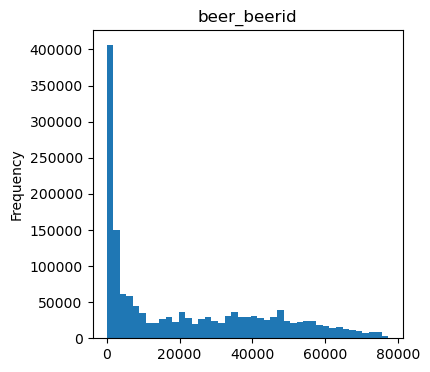

In [119]:
# 13 - beer_beerid          
print('columns #13:', df.columns[12] , ' is type:', type( df.columns[12]) )
print('Missing values',df['beer_beerid'].isna().sum())
display(df['beer_beerid'].describe())
display(df.value_counts('beer_beerid'))
display(df["beer_beerid"].plot.hist(bins=43, figsize=(4, 4)).set_title('beer_beerid'))
#display(df["beer_beerid"].value_counts().plot(kind='bar', figsize=(4, 4)).set_title('beer_beerid Distribution'))


In [120]:
df.loc[df['beer_beerid'] == 2093]

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1166284,1166284,10099,Dogfish Head Brewery,1266775164,4.0,4.5,4.5,DmanGTR,American Double / Imperial IPA,4.5,4.5,90 Minute IPA,9.0,2093
1166905,1166905,10099,Dogfish Head Brewery,1296628385,4.0,4.0,4.0,nickadams2,American Double / Imperial IPA,3.5,4.0,90 Minute IPA,9.0,2093
1170249,1170249,10099,Dogfish Head Brewery,1250389086,4.0,4.0,4.0,kegger22,American Double / Imperial IPA,4.0,4.5,90 Minute IPA,9.0,2093
1170904,1170904,10099,Dogfish Head Brewery,1230224468,5.0,5.0,5.0,fairway31533,American Double / Imperial IPA,5.0,5.0,90 Minute IPA,9.0,2093
1171046,1171046,10099,Dogfish Head Brewery,1229312994,4.0,4.5,4.0,Bung,American Double / Imperial IPA,4.0,4.0,90 Minute IPA,9.0,2093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176277,1176277,10099,Dogfish Head Brewery,1319407302,4.5,4.0,4.5,kennylopez,American Double / Imperial IPA,4.5,4.0,90 Minute IPA,9.0,2093
1176278,1176278,10099,Dogfish Head Brewery,1319326828,4.0,4.0,4.0,firedog23,American Double / Imperial IPA,4.5,4.0,90 Minute IPA,9.0,2093
1176279,1176279,10099,Dogfish Head Brewery,1319211417,4.5,4.5,4.5,heysuz,American Double / Imperial IPA,4.5,4.5,90 Minute IPA,9.0,2093
1176280,1176280,10099,Dogfish Head Brewery,1319161135,4.5,4.5,5.0,match1112,American Double / Imperial IPA,4.0,4.5,90 Minute IPA,9.0,2093


# Correlation

,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_time,1.000000,0.028710,0.067453,0.058217,0.057247,0.044498,0.144885
review_overall,0.028710,1.000000,0.616020,0.501700,0.701923,0.789824,0.138507
review_aroma,0.067453,0.616020,1.000000,0.561039,0.616947,0.716776,0.332570
review_appearance,0.058217,0.501700,0.561039,1.000000,0.566643,0.546986,0.263942
review_palate,0.057247,0.701923,0.616947,0.566643,1.000000,0.734135,0.286711
review_taste,0.044498,0.789824,0.716776,0.546986,0.734135,1.000000,0.290827
beer_abv,0.144885,0.138507,0.332570,0.263942,0.286711,0.290827,1.000000


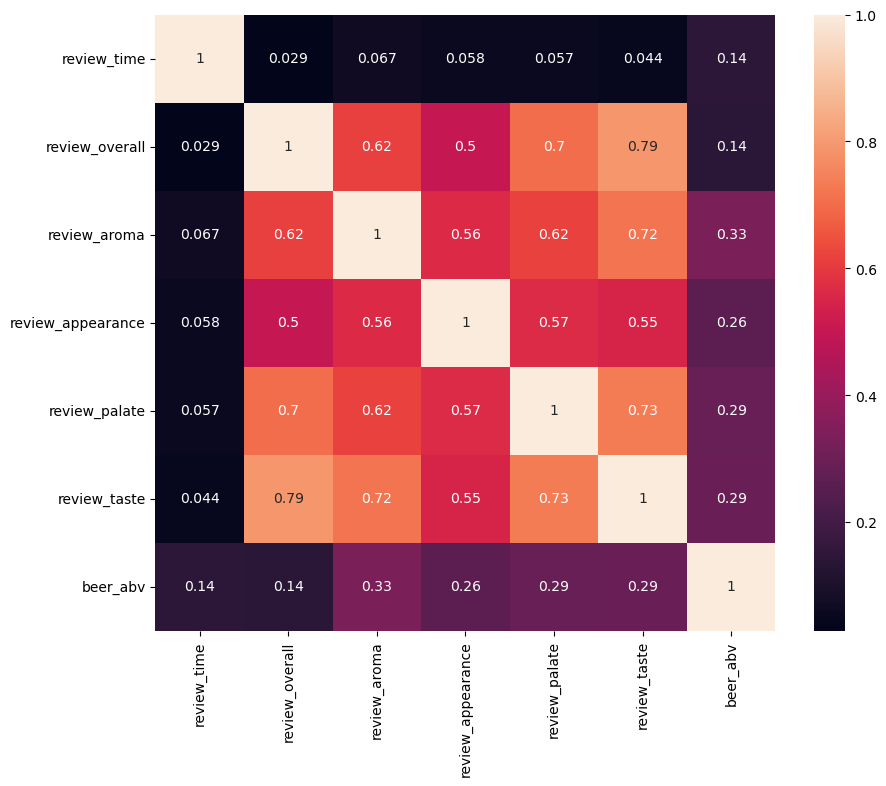

In [137]:
columns = ['review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste','beer_abv']
f, ax = plt.subplots(figsize=(10,8))

cor_fit = df[columns].corr()
display(cor_fit)
sns.heatmap(cor_fit, annot=True);


In [123]:
df.head(10)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


# END